In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = "data/combined_thin.csv"
dfnew = pd.read_csv(file,low_memory=False)

In [21]:
df=dfnew.loc[dfnew['review_scores_rating']>0]

In [22]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'name', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'Accessible',
       'Air conditioning', 'BBQ grill', 'Baby friendly', 'Changing table',
       'Bath towel', 'Bathtub', 'Beachfront', 'Breakfast', 'Coffee maker',
       'Dishwasher', 'Doorman', 'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly', 'Firm mattress', 'First aid kit', 'Free parking',
       'Game console', 'Garden or backyard', 'Gym', 'Heating', 'Hot tub',
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed', 'Pool', 'Private bathroom',
   

In [4]:
lst=[]
lst=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel', 'Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher', 'Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress', 'First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym',
       'Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed',
       'Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator', 'Smoking allowed',
       'Stove', 'Suitable for events', 'TV']

In [5]:
df1 = df[['city','review_scores_rating']].groupby('city').mean()
df1b=df1.rename(columns={'review_scores_rating': 'AverageRating'})

In [6]:
for each in lst:
    df2 = df.loc[df[each]>0]
    df2b =df2[['city','review_scores_rating']].groupby('city').mean()
    df1b=df1b.join(df2b.rename(columns={'review_scores_rating': each}), on='city',how='left')

In [7]:
df_chart = df1b

In [8]:
df_chart.head()

,AverageRating,Accessible,Air conditioning,BBQ grill,Baby friendly,Changing table,Bath towel,Bathtub,Beachfront,Breakfast,...,Long term stays allowed,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Smoking allowed,Stove,Suitable for events,TV
city,,,,,,,,,,,,,,,,,,,,,
Boston,93.597518,95.012121,94.082774,96.892857,95.546012,98.142857,NaN,95.083700,92.333333,95.307210,...,93.941860,94.936170,97.500000,95.574394,93.466019,94.274476,91.682927,94.328685,93.438202,94.013308
Chicago,95.102868,94.722727,95.311226,94.947368,96.676259,96.846154,NaN,95.959091,NaN,95.433333,...,95.187500,95.657005,98.000000,95.643750,96.237288,95.413043,93.408333,95.295455,94.198473,95.341014
DC,94.827317,94.924901,94.874811,93.500000,96.829412,96.818182,NaN,96.553488,NaN,96.105948,...,93.619048,94.305147,97.166667,96.203704,95.989247,94.282609,89.990291,94.000000,93.746032,95.017160
LA,94.305714,94.022182,94.461764,98.250000,96.413978,96.588235,NaN,95.677258,NaN,94.982625,...,98.250000,94.364801,100.000000,95.466142,95.261044,98.333333,93.600989,96.500000,93.771641,94.537870
NYC,93.506553,94.265203,93.735578,94.908127,95.178882,95.597403,NaN,94.847405,95.466667,94.641670,...,94.410204,93.782427,94.714286,94.567010,94.583821,94.774601,91.603970,94.753107,92.454959,93.901378


In [9]:
lst1=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel']
lst2=['Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher']
lst3=['Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress']
lst4=['First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym']
lst5=['Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron']
lst6=['Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed']
lst7=['Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator']
lst8=['Smoking allowed',
       'Stove', 'Suitable for events', 'TV']


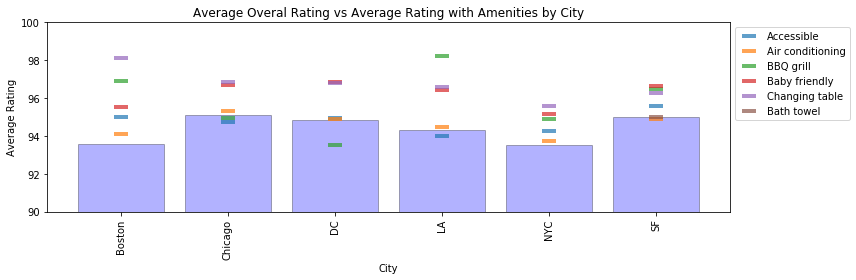

In [20]:
color = 'blue'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst1:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(90,100)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by City')
plt.ylabel('Average Rating')
plt.xlabel('City')
plt.tight_layout()
plt.savefig("Images/Chart1_Set2.png")
plt.show()


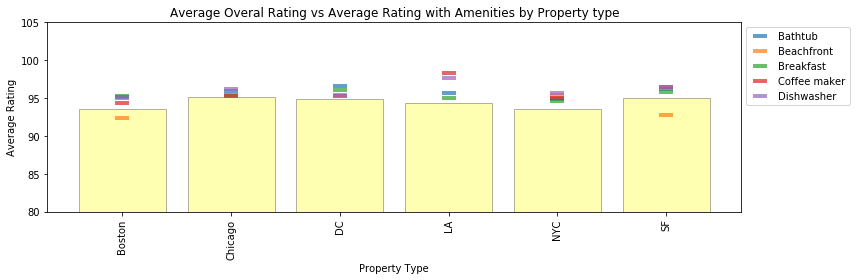

In [11]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst2:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart2_Set2.png")
plt.show()


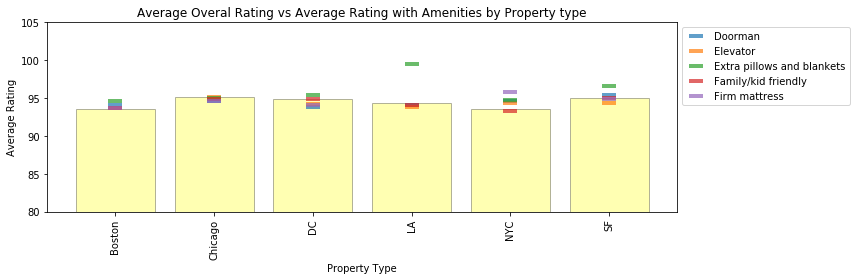

In [12]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst3:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart3_Set2.png")
plt.show()


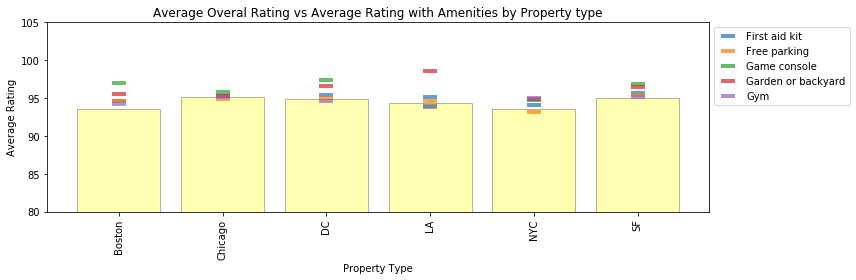

In [13]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst4:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart4_Set2.png")
plt.show()


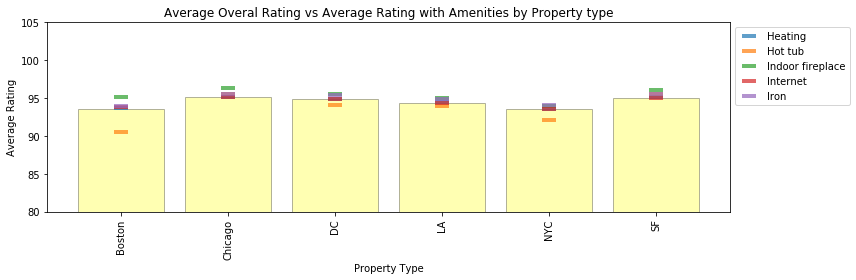

In [14]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst5:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart5_Set2.png")
plt.show()


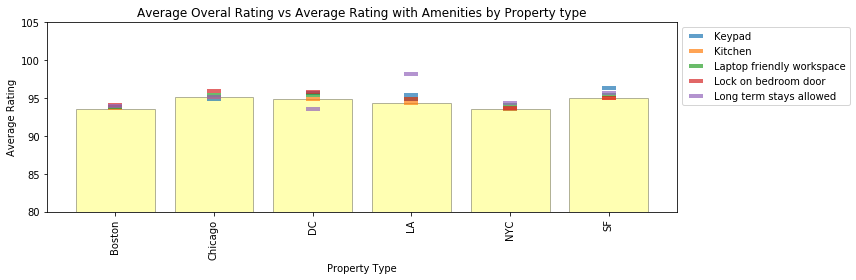

In [15]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst6:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart6_Set2.png")
plt.show()


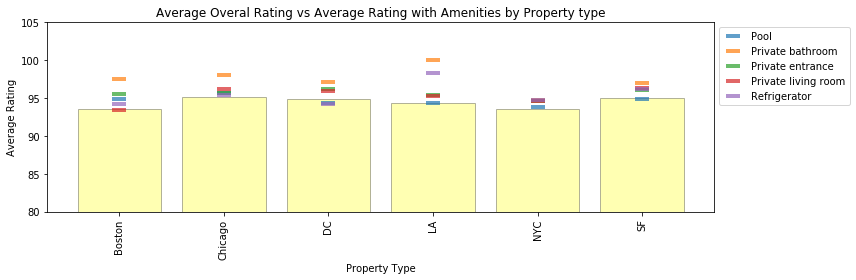

In [16]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst7:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart7_Set2.png")
plt.show()


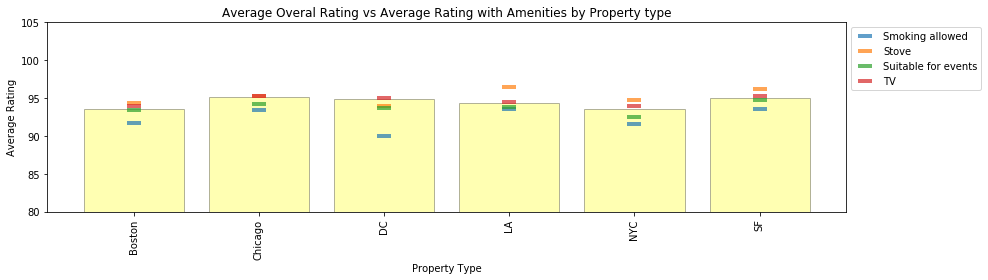

In [17]:
color = 'yellow'
plt.figure(figsize=(12,4))
plt.bar(df_chart.index, df_chart['AverageRating'],alpha=.3,  color=color, edgecolor = "black",linewidth=1)
for each in lst8:
    plt.plot(df_chart.index, df_chart[str(each)],alpha=.7,linestyle='None',marker='_',mew=4,ms=14)
plt.tick_params(axis='x',rotation=90)
plt.ylim(80,105)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.title('Average Overal Rating vs Average Rating with Amenities by Property type')
plt.ylabel('Average Rating')
plt.xlabel('Property Type')
plt.tight_layout()
plt.savefig("Images/Chart8_Set2.png")
plt.show()
